# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CX gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 2 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 10
#Number of Cliffords in the sequence 
nCliffs = [1,5,10,20,30,50,75,100,125,150]
#2Q RB on Q0,Q1 
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CX gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

CX01 = rb.dihedral.CNOTDihedral(2)
CX01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

## interleaved CX gate
rb_opts['interleaved_gates'] = [(CX01, [('cx', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)
print (xdata)

[[  1   5  10  20  30  50  75 100 125 150]]


In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

       ┌──────────┐ ┌───┐                                     ░  ░ »
qr_0: ─┤ U1(pi/4) ├─┤ X ├──■────────────────■─────────────────░──░─»
      ┌┴──────────┴┐└───┘┌─┴─┐┌──────────┐┌─┴─┐┌────────────┐ ░  ░ »
qr_1: ┤ U1(2.3562) ├─────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(2.3562) ├─░──░─»
      └────────────┘     └───┘└──────────┘└───┘└────────────┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════»
                                                                   »
cr_1: ═════════════════════════════════════════════════════════════»
                                                                   »
«                                               ┌───┐    ┌────────────┐┌─┐
«qr_0: ───────────────■──────────────────■──────┤ X ├────┤ U1(5.4978) ├┤M├
«      ┌───────────┐┌─┴─┐┌────────────┐┌─┴─┐┌───┴───┴───┐└────┬─┬─────┘└╥┘
«qr_1: ┤ U1(3.927) ├┤ X ├┤ U1(4.7124) ├┤ X ├┤ U1(3.927) ├─────┤M├───────╫─
«      └───────────┘└───┘└────────────┘└───┘└───────────┘     └╥┘       ║ 
«cr_

In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

       ┌──────────┐ ┌───┐                                     ░       ░  ░ »
qr_0: ─┤ U1(pi/4) ├─┤ X ├──■────────────────■─────────────────░───■───░──░─»
      ┌┴──────────┴┐└───┘┌─┴─┐┌──────────┐┌─┴─┐┌────────────┐ ░ ┌─┴─┐ ░  ░ »
qr_1: ┤ U1(2.3562) ├─────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(2.3562) ├─░─┤ X ├─░──░─»
      └────────────┘     └───┘└──────────┘└───┘└────────────┘ ░ └───┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«                            ┌───┐    ┌────────────┐┌─┐
«qr_0: ────────────────■─────┤ X ├────┤ U1(5.4978) ├┤M├
«      ┌────────────┐┌─┴─┐┌──┴───┴───┐└────┬─┬─────┘└╥┘
«qr_1: ┤ U1(4.7124) ├┤ X ├┤ U1(pi/2) ├─────┤M├───────╫─
«      └────────────┘└───┘└──────────┘     └╥┘       ║ 
«cr_0: ════════════════════

In [6]:
print (rb_cnotdihedral_X_circs[0][0])

      ┌───┐ ░  ┌──────────┐ ┌───┐                                     ░  ░ »
qr_0: ┤ H ├─░──┤ U1(pi/4) ├─┤ X ├──■────────────────■─────────────────░──░─»
      ├───┤ ░ ┌┴──────────┴┐└───┘┌─┴─┐┌──────────┐┌─┴─┐┌────────────┐ ░  ░ »
qr_1: ┤ H ├─░─┤ U1(2.3562) ├─────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(2.3562) ├─░──░─»
      └───┘ ░ └────────────┘     └───┘└──────────┘└───┘└────────────┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«                                               ┌───┐    ┌────────────┐  ░  »
«qr_0: ───────────────■──────────────────■──────┤ X ├────┤ U1(5.4978) ├──░──»
«      ┌───────────┐┌─┴─┐┌────────────┐┌─┴─┐┌───┴───┴───┐└─────░──────┘┌───┐»
«qr_1: ┤ U1(3.927) ├┤ X ├┤ U1(4.7124) ├┤ X ├┤ U1(3.927) ├──────░───────┤ 

In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

      ┌───┐ ░  ┌──────────┐ ┌───┐                                     ░      »
qr_0: ┤ H ├─░──┤ U1(pi/4) ├─┤ X ├──■────────────────■─────────────────░───■──»
      ├───┤ ░ ┌┴──────────┴┐└───┘┌─┴─┐┌──────────┐┌─┴─┐┌────────────┐ ░ ┌─┴─┐»
qr_1: ┤ H ├─░─┤ U1(2.3562) ├─────┤ X ├┤ U1(pi/2) ├┤ X ├┤ U1(2.3562) ├─░─┤ X ├»
      └───┘ ░ └────────────┘     └───┘└──────────┘└───┘└────────────┘ ░ └───┘»
cr_0: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
cr_1: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
«       ░  ░                       ┌───┐    ┌────────────┐  ░  ┌───┐┌─┐
«qr_0: ─░──░─────────────────■─────┤ X ├────┤ U1(5.4978) ├──░──┤ H ├┤M├
«       ░  ░ ┌────────────┐┌─┴─┐┌──┴───┴───┐└─────░──────┘┌───┐└┬─┬┘└╥┘
«qr_1: ─░──░─┤ U1(4.7124) ├┤ X ├┤ U1(pi/2) ├──────░───────┤ H ├─┤M├──╫─
«

### Add a depolarize noise to the CS gate

In [8]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Q = 0.0005
p2Q = 0.01/0.75

# Construct the error
cs_error = errors.depolarizing_error(p2Q, 2)
print ("Depolarizing errors on u2,u3,cs,cx gates respectively:", p1Q, 2*p1Q, p2Q, p2Q)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

Depolarizing errors on u2,u3,cs,cx gates respectively: 0.0005 0.001 0.013333333333333334 0.013333333333333334
NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['cx', 'cs', 'u2', 'u3']
  All-qubits errors: ['u2', 'u3', 'cx', 'cs']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


### Execute the RB sequences

In [9]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral X Circuits


In [10]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [11]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Z Circuits


In [12]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [13]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [14]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.73520928, 0.97520925, 0.24546889]), 'params_err': array([0.00907561, 0.00108722, 0.00934907]), 'epc': 0.018593062073494898, 'epc_err': 0.000836145786791864}


In [15]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.74186267, 0.97390215, 0.24517401]), 'params_err': array([0.00912715, 0.00110732, 0.0093628 ]), 'epc': 0.019573388461240904, 'epc_err': 0.0008527417953223823}


In [16]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [17]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.73732206, 0.96390827, 0.23753272]), 'params_err': array([0.01427582, 0.00178905, 0.00974488]), 'epc': 0.027068799195362175, 'epc_err': 0.0013920265399935063}


In [18]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.72043629, 0.96093982, 0.26292381]), 'params_err': array([0.0073271 , 0.00131486, 0.00567804]), 'epc': 0.029295135395684985, 'epc_err': 0.0010262289647003978}


In [19]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [20]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.9741635690884112, 'alpha_err': 0.0009365216737544528, 'epg_est': 0.01937732318369162, 'epg_est_err': 0.0007210198344546114}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9615335091258395, 'alpha_err': 0.0011558722604051858, 'epg_est': 0.028849868155620406, 'epg_est_err': 0.0009015850067378508}


In [21]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))
print('RB fidelity = %.5f' % (1 - r_est))

Estimated gate error: 0.009724 (0.001013)
RB fidelity = 0.99028


### Plot the results

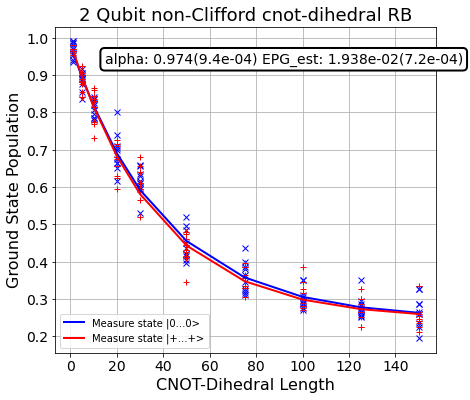

In [22]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

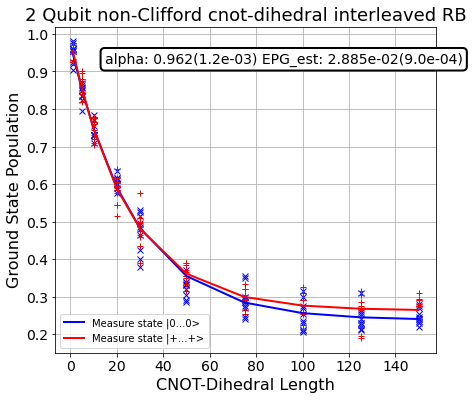

In [23]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()